# Exploratory Data Analysis

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

train_dataset_path = '../../data/disease_prediction/Training.csv'
test_dataset_path = '../../data/disease_prediction/Testing.csv'

train_dataset = pd.read_csv(train_dataset_path)
test_dataset = pd.read_csv(test_dataset_path)

In [26]:
train_dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [27]:
test_dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [28]:
train_dataset['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [37]:
# Display how many unique classes are there in the dataset
train_dataset['prognosis'].nunique()

41

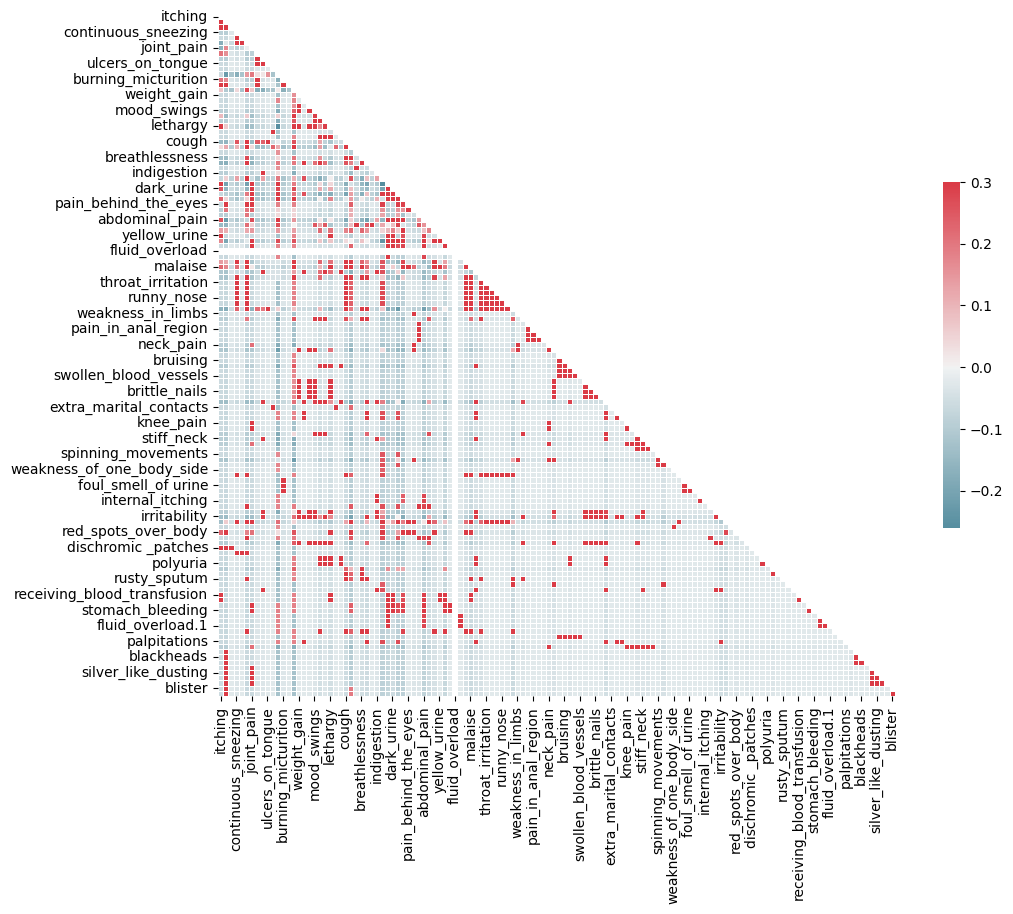

In [32]:
# Compute correlation matrix (excluding the last column which is the prognosis)
corr = train_dataset.iloc[:, :-2].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones(corr.shape)).astype(bool)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


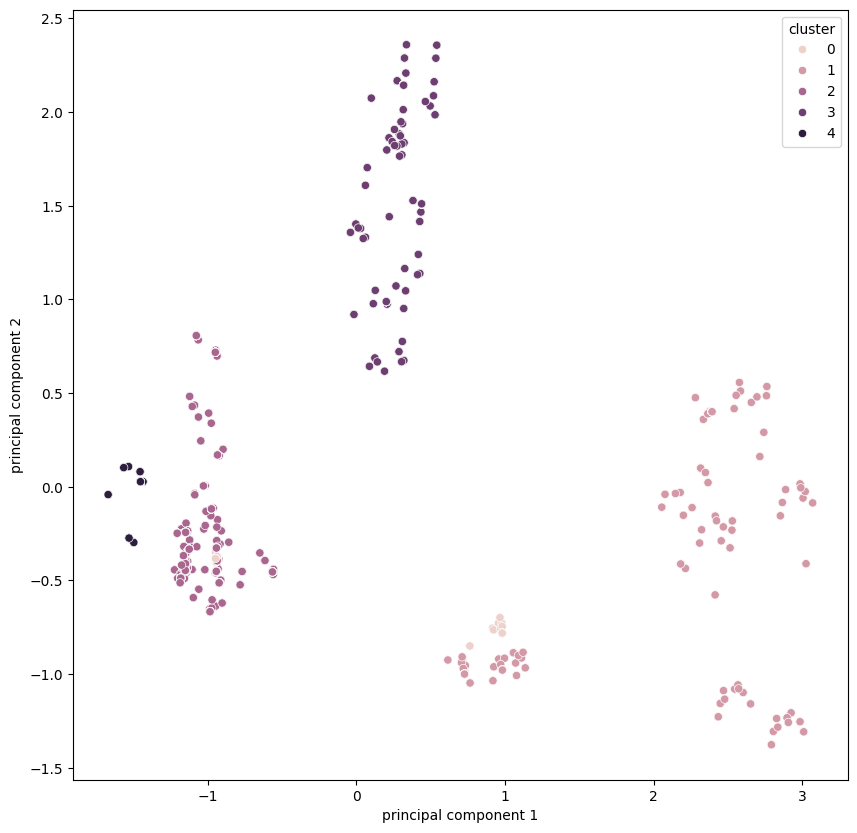

In [34]:
# Perform clustering analysis on the dataset, displaying the symptoms and clusters as a scatter plot

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Drop the prognosis column
X = train_dataset.drop(columns=['prognosis'])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5).fit(X)

# Add the cluster labels to the dataset
train_dataset['cluster'] = kmeans.labels_

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data = pca_result, columns = ['principal component 1', 'principal component 2'])

# Add the cluster labels to the PCA DataFrame
pca_df['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='cluster', data=pca_df)

plt.show()

In [36]:
centroids = kmeans.cluster_centers_

for i, centroid in enumerate(centroids):
    top_symptoms = [X.columns[i] for i in centroid.argsort()[-5:]]
    print(f"Cluster {i}: {top_symptoms}")


# Get the top 5 features for each component
for i, component in enumerate(pca.components_, 1):
    top_features = [X.columns[i] for i in component.argsort()[-5:]]
    print(f"Principal component {i}: {top_features}")

Cluster 0: ['increased_appetite', 'polyuria', 'obesity', 'fatigue', 'cluster']
Cluster 1: ['malaise', 'headache', 'chills', 'high_fever', 'fatigue']
Cluster 2: ['chest_pain', 'loss_of_balance', 'skin_rash', 'vomiting', 'cluster']
Cluster 3: ['loss_of_appetite', 'abdominal_pain', 'yellowing_of_eyes', 'yellowish_skin', 'cluster']
Cluster 4: ['excessive_hunger', 'irritability', 'palpitations', 'slurred_speech', 'cluster']
Principal component 1: ['loss_of_appetite', 'malaise', 'chills', 'high_fever', 'fatigue']
Principal component 2: ['yellowing_of_eyes', 'vomiting', 'loss_of_appetite', 'yellowish_skin', 'abdominal_pain']
